In [1]:
import platform
import os
from datetime import datetime

import numpy as np
from matplotlib import pyplot as plt

from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 5  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 1  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'ip1_fe55_selftrig_3-12-25'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'hv_450'

det_single = 'inter_plein_1'

file_nums = [0]
# file_nums = 'all'

noise_threshold_sigmas = 5

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [4]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')

print(f'Detector center: {det.center}')
print(f'Detector active size: {det.active_size}')

# det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=True)
det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=False)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 800, 'resist_2': 450}
Detector center: [  9.2  38.4 712.7]
Detector active size: [127.125 127.      4.   ]
Reading in data...


100%|██████████| 1/1 [00:29<00:00, 29.62s/it]


Read in data shape: (26218, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 75.03it/s]


Fitting time: 0.5600063800811768 s
Processed chunk 1/1
Getting hits...
Hits shape: (26218, 256)


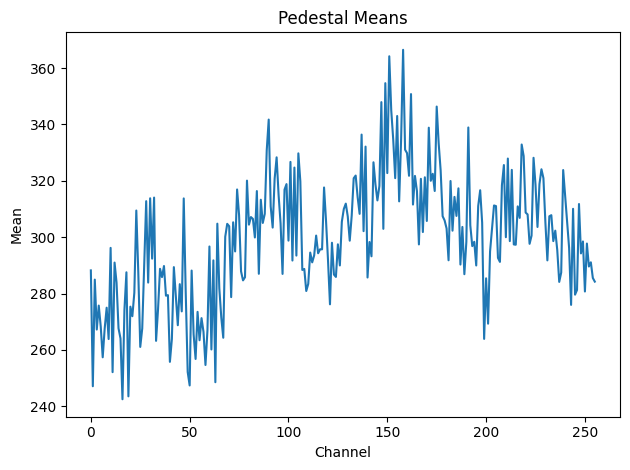

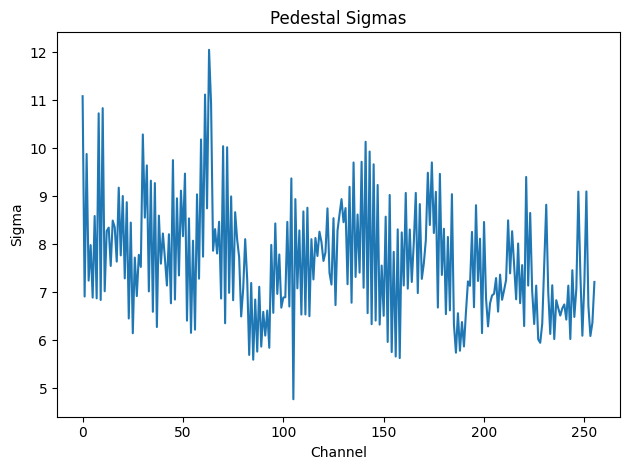

In [5]:
det.dream_data.plot_pedestals()

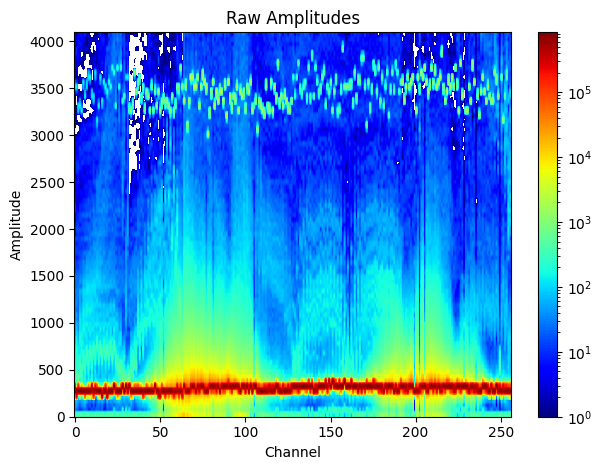

In [6]:
det.dream_data.plot_raw_amps_2d_hist()

In [7]:
# for event_num in range(min(len(det.dream_data.hits), 20)):
    # det.plot_event_1d(event_num)
    # det.plot_event_2d(event_num)
    # det.dream_data.plot_waveforms(event_num)

In [8]:
# det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38]
Connector 2 Dead Strips: [105 122 124 125 126 127]
Connector 3 Dead Strips: [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165]
Connector 4 Dead Strips: [228 235 247 249 251]


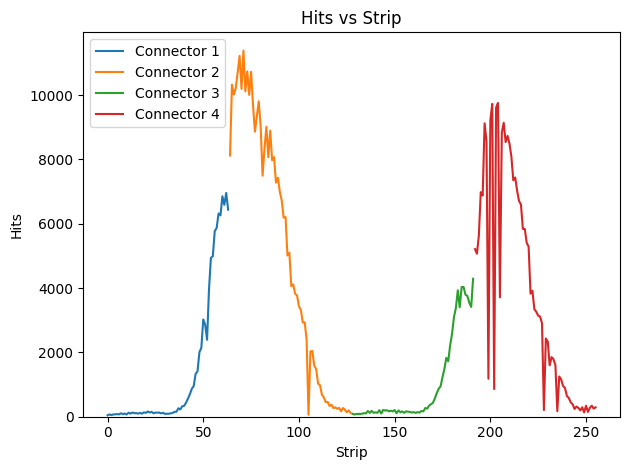

In [9]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

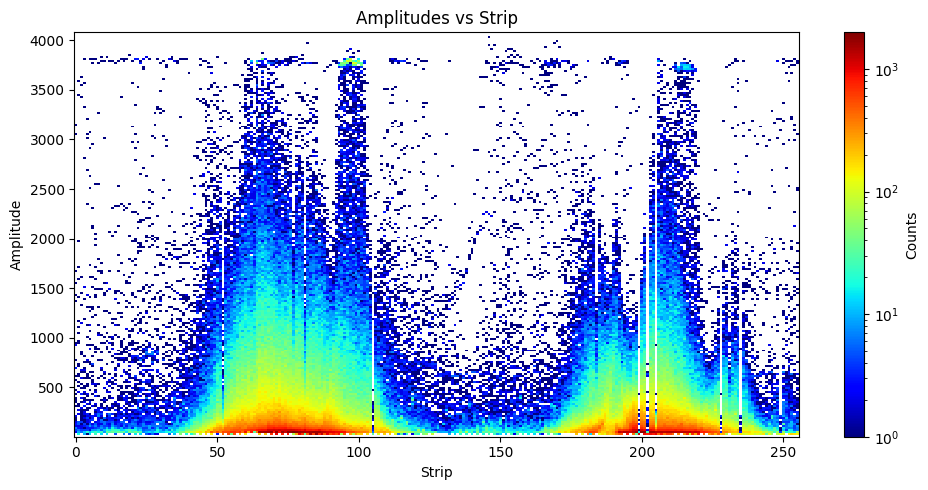

In [10]:
det.dream_data.plot_amplitudes_vs_strip()

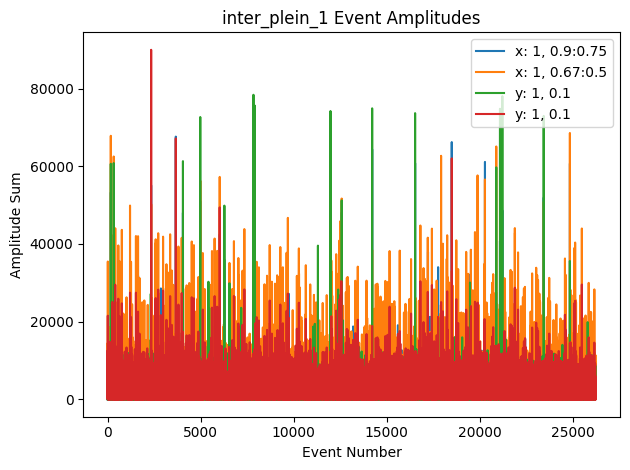

In [11]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

# if realign_dream:
#     det.add_rotation(90, 'z')

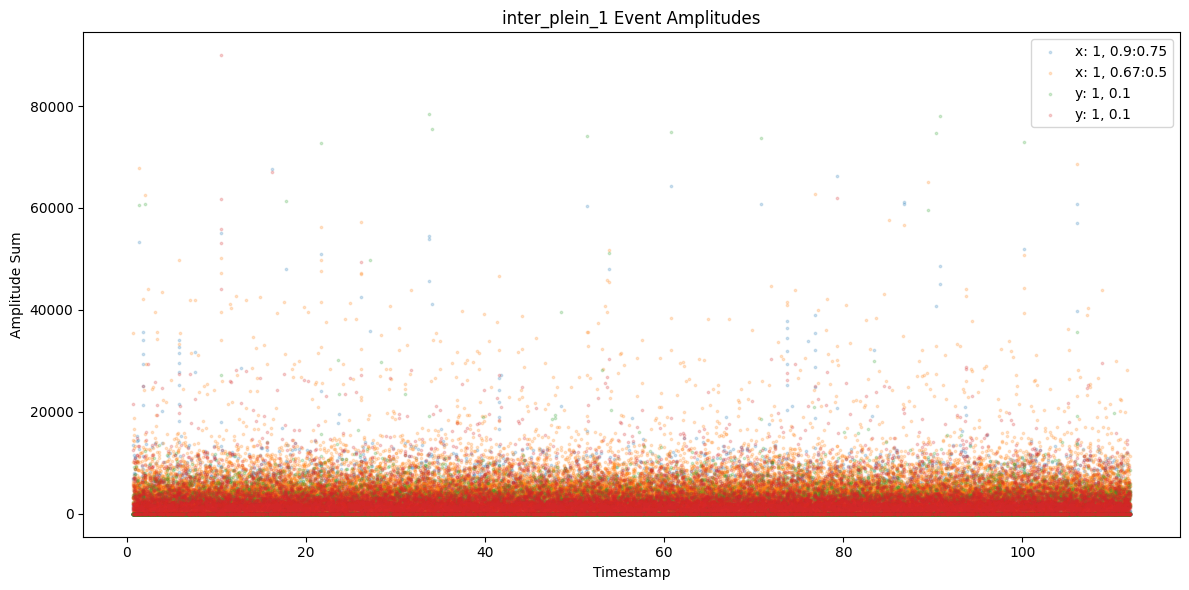

In [12]:
start_date_time = datetime(2025, 2, 27, 17, 25)
# det.plot_xy_amp_sum_vs_timestamp(x_range=(0, 2.7e13 / 1e8), t_start=start_date_time)
det.plot_xy_amp_sum_vs_timestamp()
# det.plot_xy_amp_sum_vs_timestamp(t_start=start_date_time)

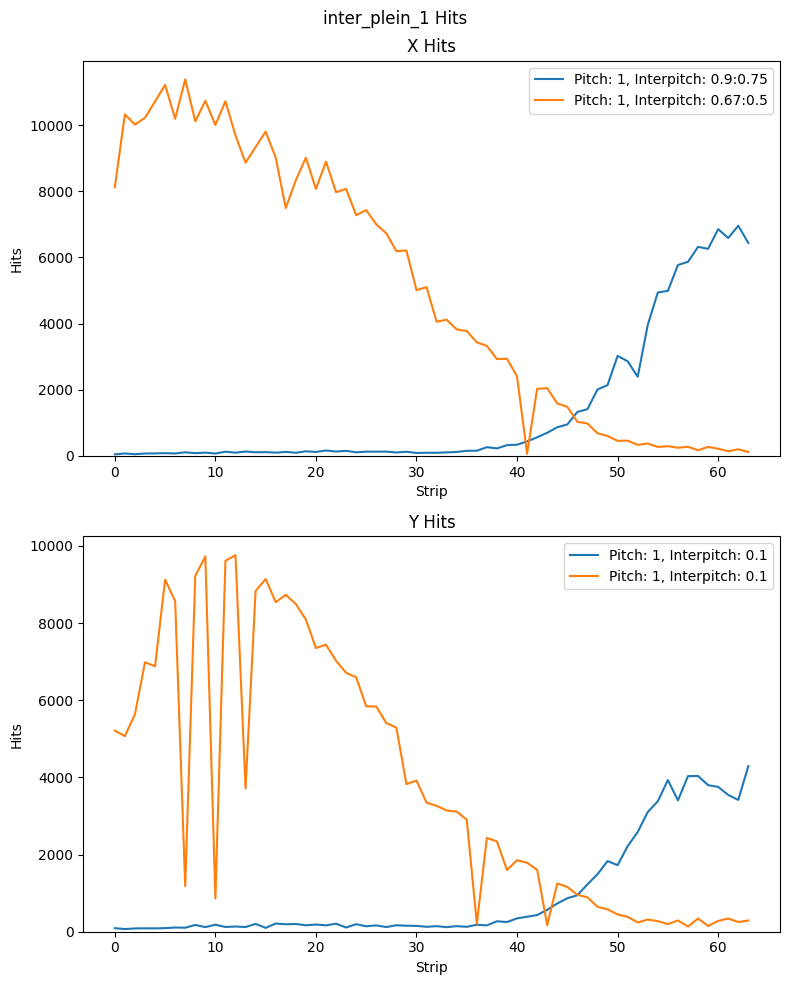

In [13]:
det.plot_hits_1d()

In [14]:
print(len(det.dream_data.hits))

26218


In [15]:
# for event_num in range(min(len(det.dream_data.hits), 2)):
#     det.plot_event_1d(event_num)
#     det.plot_event_2d(event_num)
#     det.dream_data.plot_waveforms(event_num)

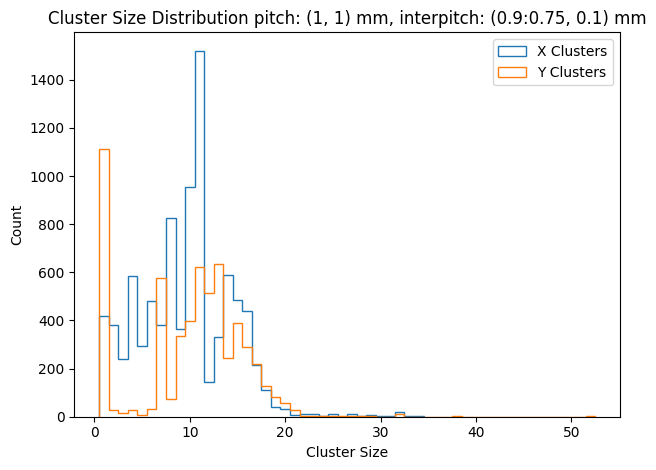

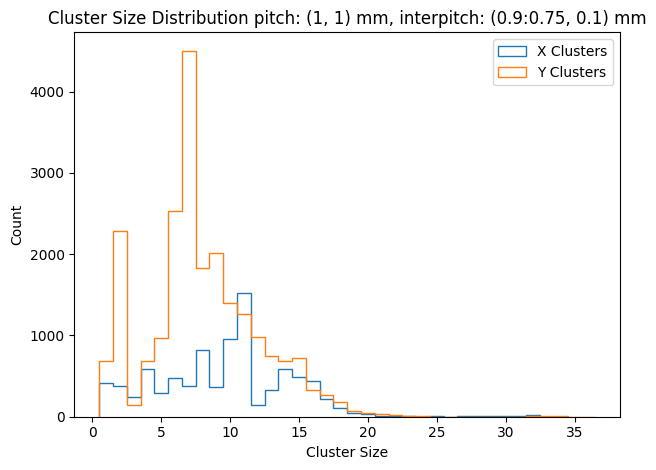

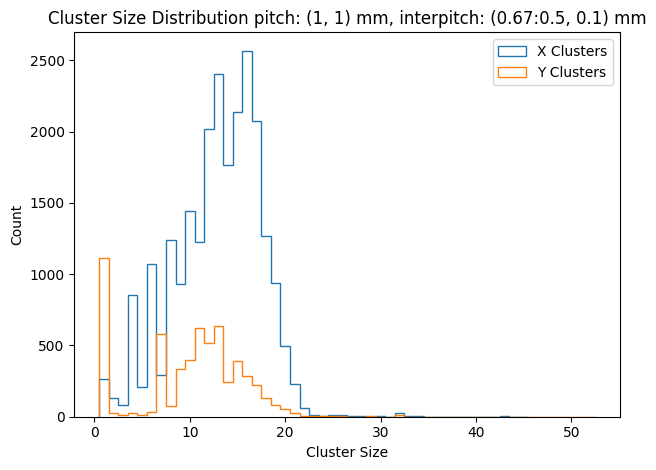

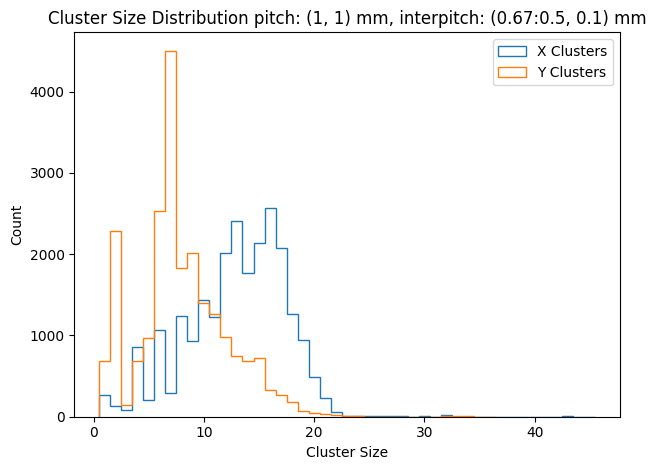

In [16]:
for sub_det in det.sub_detectors:
    sub_det.plot_cluster_sizes()

In [17]:
det.get_det_clusters()

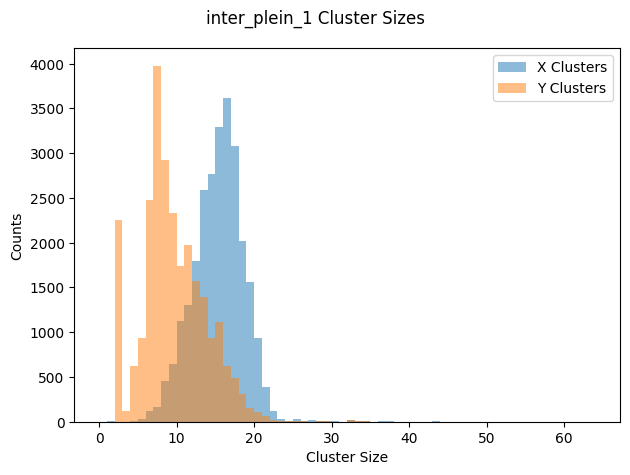

In [18]:
det.plot_cluster_sizes()

(26215,)


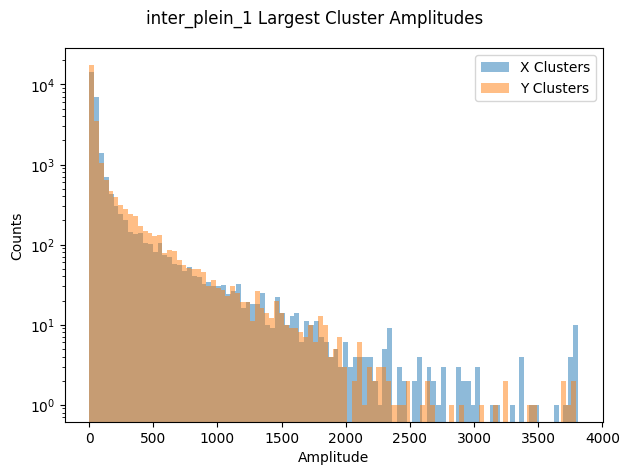

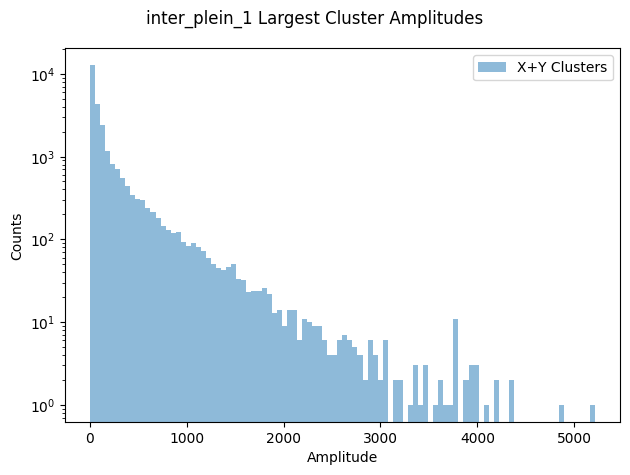

In [19]:
det.plot_cluster_amps()